 The project aims to identify the abnormal consumption in the data. There are a number of scenerios where i identify abnomality,this include the running time of the generator that is more than 24hours in one day, There is an indication that the fuel is being consumed and the running time is zero and lastlly the consumption per day exceed the maximu it can consume in one day. These are sme of the cases i used to generate my target to classify the sample is fraud or not. 

In [1]:
import numpy as np
import os
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from pandas.tools.plotting import scatter_matrix
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import pydotplus as pydot 
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from pandas import set_option
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [2]:
Data = pd.read_excel("Gen.xlsx",sheet_name="data").dropna(how = "any")
Data['Generator 1capacity (KVA)'] = Data['Generator 1capacity (KVA)'].astype("category")
Data = Data.dropna(how = 'any')

Quantity consumed  between visit is  difference between the fuel found in the generator and previously left in the generator.


Consumption_perDay_within_a_period is the total fuel consumed between the period divided by number of day between the period. 

In [3]:
Data['consumption_perDay_within_a_period'] = Data['Consumption HIS']/(Data['NBRE DE JOUR'])
Data.loc[~np.isfinite(Data['consumption_perDay_within_a_period']), 'consumption_perDay_within_a_period'] = 0
Data['Quanitity_consumed_btn_visits'] = Data['QTE FUEL PRECEDENTE'] - Data['QTE FUEL TROUVEE']

In [4]:
Data.drop(['Power Type'],axis=1, inplace=True)
Data.drop(['ANCIEN COMPTEUR HORAIRE G1'],axis=1, inplace=True)
Data.drop(['Class'],axis=1, inplace=True)
Data.drop(['DATE  EFFECTIVE DE LA VISITE'],axis=1, inplace=True)
Data.drop(['DATE DE VISITE PRECEDENTE'],axis=1, inplace=True)
#Data.drop(['Class'],axis=1, inplace=True)
Data.drop(['Months'],axis=1, inplace=True)
Data.drop(['Cluster'],axis=1, inplace=True)
Data.drop(['Site Name'],axis=1, inplace=True)
Data.drop(['Generator 1capacity (KVA)'],axis=1, inplace=True)

Generate a colunm of running time per day. and identify which exceed 24hours.

In [5]:

Data['Running time per day'] = Data["NBRE HEURES DE FONCTIONNEMENT DG1"]/Data["NBRE DE JOUR"]             
Data.loc[~np.isfinite(Data['Running time per day']), 'Running time per day'] = 0

Maximum fuel per day the generator can consume in one day

In [6]:
Data['Maximum_consumption_perDay'] = Data[['CONSOMMATION HORAIRE DE FUEL DG1']]*24

In [7]:
a = list(Data['NBRE HEURES DE FONCTIONNEMENT DG1'])
b = list(Data['Quanitity_consumed_btn_visits'])

In [8]:
c = []
for i in range(len(a)):
    if a[i] == 0  and  b[i]!=0:
        c.append(-1)
    else:
        c.append(1)

In [9]:
x = list(Data['Maximum_consumption_perDay'])
y = list (Data['consumption_perDay_within_a_period'])

In [10]:
z = []
for i in range(len(y)):
    if y[i] > x[i]:
        z.append(-1)
    else:
        z.append(1)

In [11]:
p = []
for i in range(len(z)):
    if c[i]==1 and z[i]==1:
        p.append(1)
    else:
        p.append(-1)     

## Class of target varibale where -1 indicates fraud and 1 indicates not fraud.

In [12]:
Data['Class'] = p

In [13]:
Data.head()

,NBRE DE JOUR,COMPTEUR HORAIRE ACTUEL GE1,QTE FUEL PRECEDENTE,QTE FUEL TROUVEE,QTE FUEL AJOUTEE,QTE TOTALE LAISSEE,Consumption HIS,NBRE HEURES DE FONCTIONNEMENT DG1,CONSOMMATION HORAIRE DE FUEL DG1,consumption_perDay_within_a_period,Quanitity_consumed_btn_visits,Running time per day,Maximum_consumption_perDay,Class
0,6,21136,461.0,111.0,375.0,486.0,420.0,140.0,3.0,70.0,350.0,23.333333,72.0,1
1,4,2522,685.0,440.0,0.0,440.0,254.8,98.0,2.6,63.7,245.0,24.500000,62.4,-1
2,5,13284,495.0,280.0,200.0,480.0,238.0,119.0,2.0,47.6,215.0,23.800000,48.0,1
3,6,19895,350.0,140.0,300.0,440.0,288.0,144.0,2.0,48.0,210.0,24.000000,48.0,1
4,5,16191,154.0,2.0,300.0,302.0,148.0,74.0,2.0,29.6,152.0,14.800000,48.0,1


In [14]:
x = Data.loc[:,Data.columns.tolist()[0:13]]
w = x.as_matrix()
Y = Data.loc[:,'Class']
Y = Y.as_matrix()
x_train,x_test,y_train,y_test = train_test_split(w,Y,test_size=0.20,random_state=0)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) 

/usr/lib/python3/dist-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/usr/lib/python3/dist-packages/ipykernel/__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Feature importance fitted using extratreeClaasifier.

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=250, random_state=0)
model.fit(w, Y)
print(model.feature_importances_ *100)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)

[ 4.39030254  3.82875027  3.72438075  3.27495779  3.42542562  3.41441485
  6.83243347  8.80416758  3.72054849 18.74848828  5.24150498 30.91938322
  3.67524215]


Comparison of different classification machine learning technique with no parameter tuned.

 LR : 0.660649 (0.033043)
 KNN : 0.594894 (0.026310)
 SVM : 0.633748 (0.026766)
 MLP : 0.507844 (0.098267)


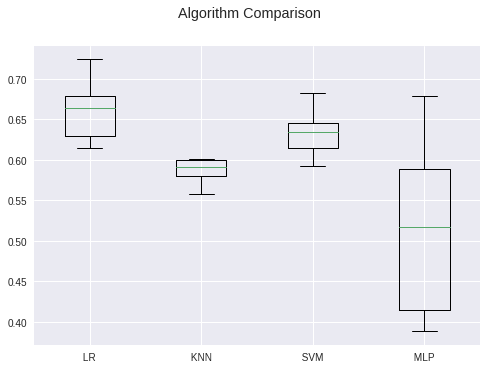

In [16]:
# Compare Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression# Compare Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' SVM ' , SVC()))
models.append(( ' MLP ' ,  MLPClassifier()))


def predictmodel(model):
    y_pred = model.predict(x_test)
    f,t,thresholds = metrics.roc_curve(y_test,y_pred)
    cm = metrics.confusion_matrix(y_test,y_pred)
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(cm)
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model,w, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Descriptive Statistics
Count.
 Mean.
 Standard Deviation
 Minimum Value.
 25th Percentile.
 50th Percentile (Median).
 75th Percentile.
 Maximum Value.

In [17]:
Types = Data.dtypes
Data.describe()

,NBRE DE JOUR,COMPTEUR HORAIRE ACTUEL GE1,QTE FUEL PRECEDENTE,QTE FUEL TROUVEE,QTE FUEL AJOUTEE,QTE TOTALE LAISSEE,Consumption HIS,NBRE HEURES DE FONCTIONNEMENT DG1,CONSOMMATION HORAIRE DE FUEL DG1,consumption_perDay_within_a_period,Quanitity_consumed_btn_visits,Running time per day,Maximum_consumption_perDay,Class
count,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000
mean,7.994395,11857.176383,596.426054,278.530703,320.998505,599.985112,291.114241,163.436472,1.856297,39.205692,317.895351,21.021979,44.551121,0.267564
std,4.028354,8719.640575,312.877527,261.877123,211.943452,314.194494,181.576590,96.535578,0.581018,19.301517,168.816946,7.689394,13.944423,0.963720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,5.000000,4224.500000,410.000000,115.000000,200.000000,415.000000,163.275000,91.000000,1.570000,24.121528,202.000000,22.191667,37.680000,-1.000000
50%,8.000000,10318.000000,553.000000,215.000000,300.000000,555.000000,266.550000,169.000000,1.900000,41.042857,304.000000,23.818182,45.600000,1.000000
75%,10.000000,17879.250000,715.000000,366.000000,500.000000,720.000000,416.200000,239.000000,2.400000,54.972955,427.000000,24.142857,57.600000,1.000000
max,49.000000,39762.000000,2530.000000,2222.000000,1200.000000,2530.000000,1315.600000,816.000000,3.500000,184.800000,1395.000000,96.000000,84.000000,1.000000


## Visualization

## Correlations Between Attributes & Skew of Univariate Distributions


In [18]:
Correlation = Data.corr(method = 'pearson')
skew = Data.skew()
print(skew)

NBRE DE JOUR                          1.371997
COMPTEUR HORAIRE ACTUEL GE1           0.791228
QTE FUEL PRECEDENTE                   2.124430
QTE FUEL TROUVEE                      2.984417
QTE FUEL AJOUTEE                      0.274607
QTE TOTALE LAISSEE                    2.167813
Consumption HIS                       0.455768
NBRE HEURES DE FONCTIONNEMENT DG1     0.424530
CONSOMMATION HORAIRE DE FUEL DG1     -0.180701
consumption_perDay_within_a_period   -0.055097
Quanitity_consumed_btn_visits         0.566607
Running time per day                 -1.100828
Maximum_consumption_perDay           -0.180701
Class                                -0.555687
dtype: float64


## Histograms andDensity plot 
group data into bins and provide you a count of the number of observations in each bin

/home/aimsadmin/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


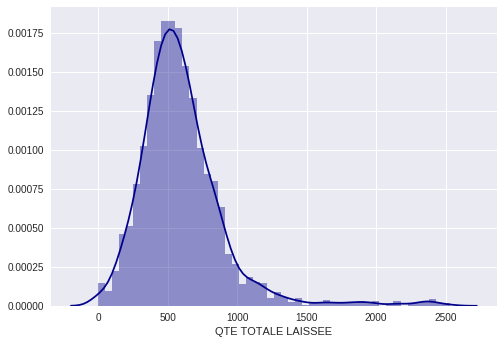

In [41]:

sns.distplot(Data["QTE TOTALE LAISSEE"], hist=True, kde=True, bins=50, color = 'darkblue')

/home/aimsadmin/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


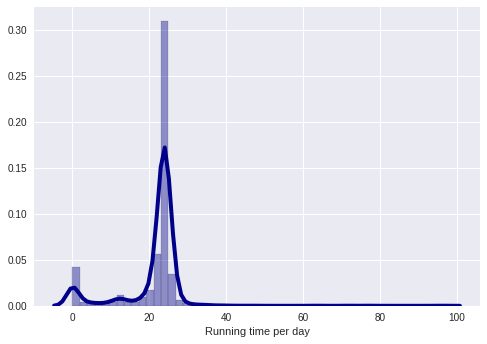

In [46]:

sns.distplot(Data["Running time per day"], hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/home/aimsadmin/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


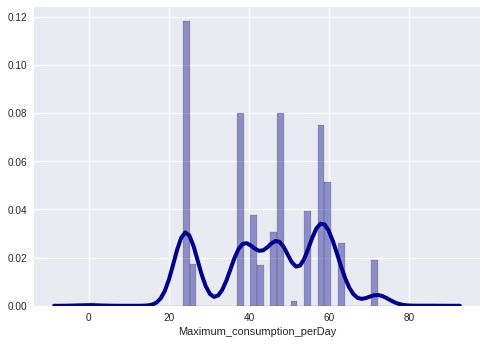

In [47]:

sns.distplot(Data["Maximum_consumption_perDay"], hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/home/aimsadmin/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


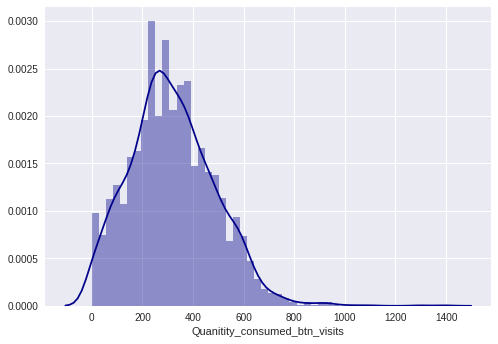

In [48]:

sns.distplot(Data["Quanitity_consumed_btn_visits"],norm_hist=True, kde=True, bins=50, color = 'darkblue')

/home/aimsadmin/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


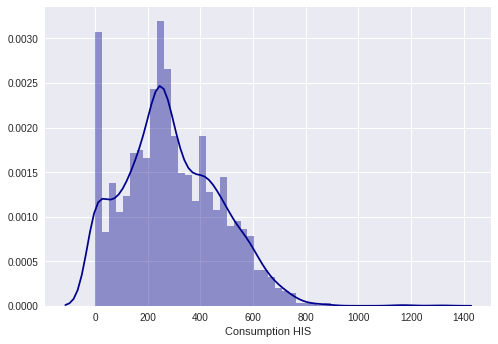

In [49]:

sns.distplot(Data["Consumption HIS"], hist=True, kde=True, bins=50, color = 'darkblue')

/home/aimsadmin/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


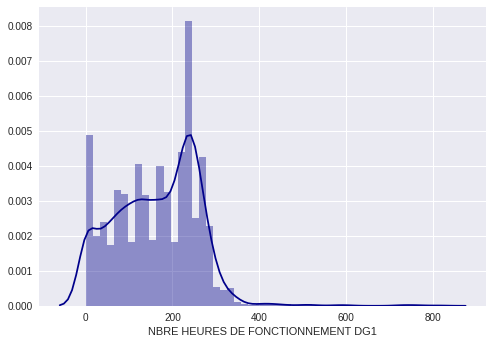

In [50]:

sns.distplot(Data["NBRE HEURES DE FONCTIONNEMENT DG1"], hist=True, kde=True, bins=50, color = 'darkblue')